In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
im_dir = '/Volumes/Tatum_SSD-1/Grad_school/m2py/Morphology_labels/OPV_morph_maps/3_component/'

im_files = os.listdir(im_dir)
print(len(im_files))
# print(im_files)

109


Below is a set of 30 substrates and devices that comprise the test set for the tabular data. We want to make sure that the test set for this network is also comprised of samples from this set, to make sure that all models are comparable. Because there is so little image data, we will only select 10 devices for our test set

In [33]:
test_set_key_dict = {
    0 : {'temp' : 125, 'time' : 5, 'sub' : 1, 'dev' : 6},
    1 : {'temp' : 175, 'time' : 15, 'sub' : 4, 'dev' : 3},
    2 : {'temp' : 125, 'time' : 5, 'sub' : 1, 'dev' : 6},
    3 : {'temp' : 100, 'time' : 15, 'sub' : 4, 'dev' : 2},
    4 : {'temp' : 100, 'time' : 5, 'sub' : 1, 'dev' : 3},
    5 : {'temp' : 100, 'time' : 15, 'sub' : 4, 'dev' : 7},
    6 : {'temp' : 125, 'time' : 15, 'sub' : 4, 'dev' : 6},
    7 : {'temp' : 125, 'time' : 5, 'sub' : 1, 'dev' : 3},
    8 : {'temp' : 125, 'time' : 15, 'sub' : 4, 'dev' : 6},
    9 : {'temp' : 125, 'time' : 30, 'sub' : 8, 'dev' : 3},
    10 : {'temp' : 100, 'time' : 15, 'sub' : 4, 'dev' : 2},
    11 : {'temp' : 125, 'time' : 30, 'sub' : 8, 'dev' : 3},
    12 : {'temp' : 100, 'time' : 5, 'sub' : 1, 'dev' : 4},
    13 : {'temp' : 100, 'time' : 15, 'sub' : 4, 'dev' : 4},
#     14 : {'temp' : 125, 'time' : 15, 'sub' : 4, 'dev' : 1},
#     15 : {'temp' : 100, 'time' : 15, 'sub' : 4, 'dev' : 2},
# #     16 : {'temp' : 125, 'time' : 5, 'sub' : 1, 'dev' : 2},
# #     17 : {'temp' : 150, 'time' : 15, 'sub' : 4, 'dev' : 1},
# #     18 : {'temp' : 125, 'time' : 15, 'sub' : 4, 'dev' : 7},
# #     19 : {'temp' : 150, 'time' : 15, 'sub' : 4, 'dev' : 1},
# #     20 : {'temp' : 100, 'time' : 5, 'sub' : 1, 'dev' : 4},
# #     21 : {'temp' : 175, 'time' : 15, 'sub' : 4, 'dev' : 7},
# #     22 : {'temp' : 100, 'time' : 30, 'sub' : 7, 'dev' : 2},
#     23 : {'temp' : 100, 'time' : 15, 'sub' : 4, 'dev' : 4},
#     24 : {'temp' : 125, 'time' : 15, 'sub' : 4, 'dev' : 2},
#     25 : {'temp' : 100, 'time' : 5, 'sub' : 1, 'dev' : 4},
#     26 : {'temp' : 125, 'time' : 5, 'sub' : 1, 'dev' : 6},
#     27 : {'temp' : 100, 'time' : 30, 'sub' : 7, 'dev' : 4},
#     28 : {'temp' : 125, 'time' : 5, 'sub' : 1, 'dev' : 3},
#     29 : {'temp' : 100, 'time' : 5, 'sub' : 1, 'dev' : 4},
}

test_set_key_df = pd.DataFrame.from_dict(test_set_key_dict, orient = 'index')
test_set_key_df.head()

,temp,time,sub,dev
0,125,5,1,6
1,175,15,4,3
2,125,5,1,6
3,100,15,4,2
4,100,5,1,3


In [34]:
im_dict = {}
label_dict = {}
idx = 0
for i, fl in enumerate(im_files[1:]):
#     print(i)
    
    if fl[-1] == 'v':
        pass
    
    elif fl[-1] == 'y':
        anl_temp = 0
        anl_time = 0
        sub = 0
        dev = 0

        if i < len(im_files):
            seg1_dir = im_dir+im_files[i]
            seg2_dir = im_dir+im_files[i+1]
            
            if im_files[i][:-6] == im_files[i+1][:-6]:
#                 print(f'saving file: #{i}: {fl}')
                
                seg1_dir = im_dir+im_files[i]
                seg2_dir = im_dir+im_files[i+1]
                
                seg1 = np.load(seg1_dir)
                seg2 = np.load(seg2_dir)
                
                sample = np.stack([seg1, seg2], axis = -1)
                sample = sample.astype(np.double)
                
                im_dict[idx] = sample
                idx += 1

                if 'NOANNEAL' in fl:
                    #time = temp = 0
                    anl_temp = 0
                    anl_time = 0
                    
                    #extract sub and dev
                    s_idx = fl.index('S')+1
                    d_idx = fl.index('D')+1
                    
                    sub = fl[s_idx]
                    dev = fl[d_idx]

                else:
                    #extract temp, time, sub, dev from filename
                    temp_stop_indx = fl.index('C')
                    anl_temp = int(fl[:temp_stop_indx])

                    time_start_indx = temp_stop_indx+2
                    time_stop_indx = fl.index('m')
                    time_stop_indx = time_stop_indx
                    anl_time = fl[time_start_indx:time_stop_indx]
                    anl_time = int(anl_time)
                    
                    if 'postexam' in fl:
                        sub = 4
                        dev = 6
                        
                    else:
                        s_idx = fl.index('b')+1
                        d_idx = fl.index('v')+1
                    
                        sub = fl[s_idx]
                        dev = fl[d_idx]
                    
                #assign entry identifiers to label key
                label_dict[idx] = {'Anneal_time' : int(anl_time), 'Anneal_temp' : int(anl_temp),
                                 'Substrate' : int(sub), 'Device': int(dev)}
                

            else:
                pass
        else:
#             print('end of loop')
            pass
    else:
#         print('Non-.npy file')
        pass
label_df = pd.DataFrame.from_dict(label_dict, orient = 'index')
print(len(label_dict))
print(len(im_dict))

36
36


In [35]:
test_sample_idxs = []

#find the indexes of the rows (samples) that match our test set's identifiers
for i, row in test_set_key_df.iterrows():
#     print(row)
#     print(row[0])
    #query for sample labels that = test set identifiers
    time_matches = label_df[label_df['Anneal_temp'] == row[0]]
#     print(len(time_matches))
    temp_matches = time_matches.query('Anneal_time == @row[1]')
#     print(len(temp_matches))
    sub_matches = temp_matches.query('Substrate == @row[2]')
#     print(len(sub_matches))
    matches = sub_matches.query('Device == @row[3]')
#     print(len(matches))

#     matches = label_df.query('Anneal_time == @row[0]' &
#                                   'Anneal_temp == @row[1]' &
#                                   'Substrate == @row[2]' &
#                                   'Device == @row[3]')
    
    if len(matches) > 0:
        #append index of match to test_sample_idxs
#         print(f"matches: {matches}")
#         print(f"number of matches: {len(matches)}")
        match_idxs = matches.index[:].tolist()
        test_sample_idxs.append(match_idxs[0])
    
    else:
        pass

    
test_sample_idxs.sort()
test_sample_idxs = list(set(test_sample_idxs))
print(len(test_sample_idxs))
print(test_sample_idxs)

10
[1, 2, 3, 7, 8, 12, 15, 18, 19, 26]


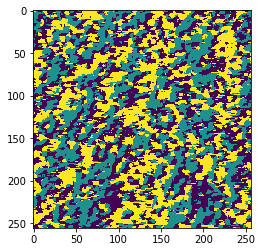

In [36]:
#using the test set indexes, extract our test set from the population

test_data = {}

for i, idx in enumerate(test_sample_idxs):
    test_data[i] = im_dict[idx]

plt.imshow(test_data[0][:,:,0])

In [37]:
train_data = {}

for key, value in im_dict.items():
    if key in test_sample_idxs:
        pass
    else:
        train_data[key] = value
        
print(len(train_data))
print(len(test_sample_idxs))
print(len(test_data))
print(len(im_dict))

26
10
10
36


In [52]:
sample_fls = []

for fl in im_files:
    if fl[-1] == 'e':
        pass
    elif fl[-1] == 'v':
        pass
    elif fl[-5] == '2':
        pass
    else:
        sample_fls.append(fl[:-9])
        
print(len(sample_fls))
print(sample_fls)

36
['100C_15min_Sub4_Dev2', '100C_15min_Sub4_Dev4', '100C_15min_Sub4_Dev7', '100C_30min_Sub7_Dev2', '100C_30min_Sub7_Dev4', '100C_30min_Sub7_Dev7', '100C_5min_Sub1_Dev3', '100C_5min_Sub1_Dev4_90D', '100C_5min_Sub1_Dev4', '125C_15min_Sub4_Dev1', '125C_15min_Sub4_Dev2', '125C_15min_Sub4_Dev6', '125C_15min_Sub4_Dev7', '125C_15min_Sub4_postexam', '125C_30min_Sub8_Dev3', '125C_30min_Sub8_postexam', '125C_5min_Sub1_Dev2', '125C_5min_Sub1_Dev3', '125C_5min_Sub1_Dev6', '125C_5min_Sub1_postexam', '150C_15min_Sub4_Dev1', '150C_15min_Sub4_Dev7', '150C_30min_Sub7_Dev3', '150C_5min_Sub1_Dev7', '175C_15min_Sub4_Dev2', '175C_15min_Sub4_Dev3', '175C_15min_Sub4_Dev7', '175C_30min_Sub8_Dev6', '175C_30min_Sub8_Dev8', '175C_5min_Sub2_Dev1', '175C_5min_Sub2_Dev3', '175C_5min_Sub2_postexam', '2018-06-29_P3HT-PCBM_NOANNEAL_S1_D1', '2018-06-29_P3HT-PCBM_NOANNEAL_S1_D4', '2018-06-29_P3HT-PCBM_NOANNEAL_S2_D1', '2018-06-29_P3HT-PCBM_NOANNEAL_S3_D1']


Now that we have two dictionaries with our image data, and a sample key to link each index to a filename, we can now save them into separate folders to build pytorch dataloaders directly in the notebook

In [53]:
for key, val in train_data.items():
    np.save('/Volumes/Tatum_SSD-1/Grad_school/m2py/Morphology_labels/OPV_morph_maps/train_set/'+sample_fls[key]+'_labels.npy', val)
    
for key, val in test_data.items():
    np.save('/Volumes/Tatum_SSD-1/Grad_school/m2py/Morphology_labels/OPV_morph_maps/test_set/'+sample_fls[key]+'_labels.npy', val)